# Linear Regression Assignment- Bike Sharing

-  BoomBikes aspires to understand the demand for shared bikes among the people
-  to understand the factors on which the demand for these shared bikes depends.
-  to understand the factors affecting the demand for these shared bikes in the American market
-  The company wants to know:

    -   Which variables are significant in predicting the demand for shared bikes.
    -   How well those variables describe the bike demands

## Business Goal

-   model the demand for shared bikes with the available independent variables.
-  to understand how exactly the demands vary with different features. 
-  manipulate the business strategy to meet the demand levels and meet the customer's expectations.


### Data Preparation:

-  'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them
-  convert such feature values into categorical string values
-  column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively.
-  the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction.

### Model Building

There are three columns named 'casual', 'registered', and 'cnt'. 

    - The variable 'casual' indicates the number casual users who have made a rental. 
    - The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. 
    - The 'cnt' variable indicates the total number of bike rentals, including both casual and registered. 
    - The model should be built taking this 'cnt' as the target variable.
### Model Evaluation:    

Haivng model building and residual analysis and have made predictions on the test set,Perform/calculate the R-squared score on the test set.

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

- where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.

## Bike Sharing Assignment Steps
    -   1. Reading, understanding ,Visualizing data
    -   2. Preparing the data for modelling (train-test split,rescaling)
    -   3. Train the Model
    -   4. Residual analysis
    -   5. Prediction and evaluation

### 1. Reading and understanding data



In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [517]:
day =pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [518]:
#Check for missing values
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [519]:
day.shape

(730, 16)

In [520]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [521]:
# visualize numerical variables
#sns.pairplot(day)

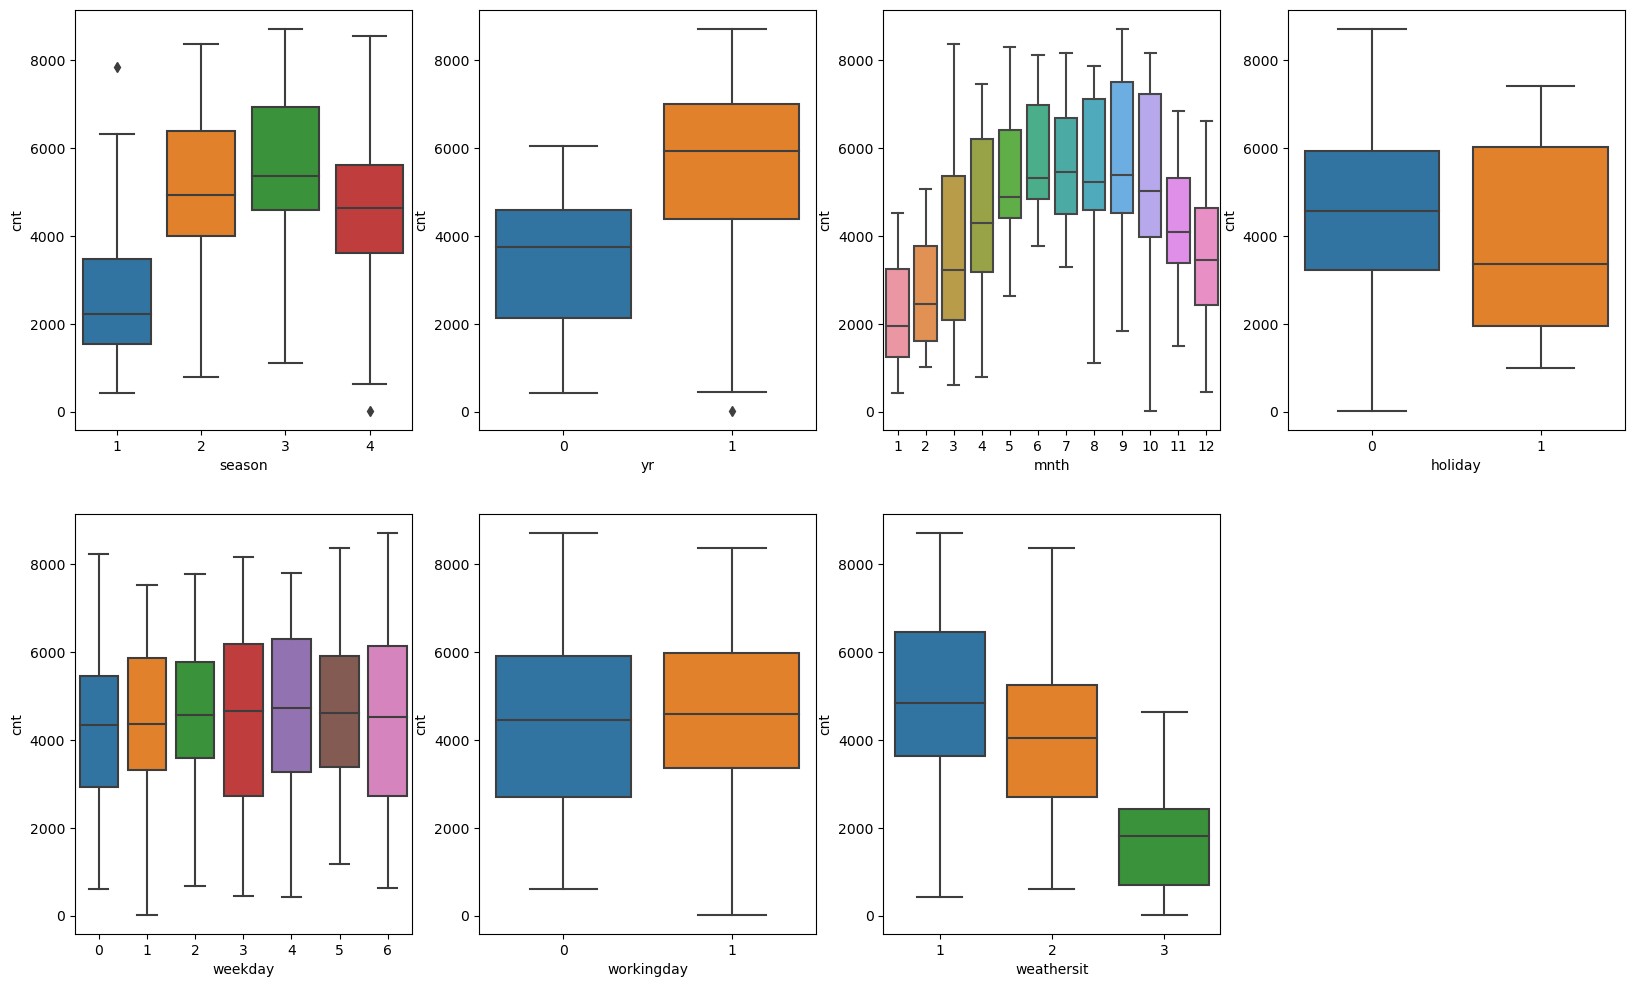

In [522]:
# visualize categorical variables

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.boxplot(x="season", y='cnt', data=day)

plt.subplot(2,4,2)
sns.boxplot(x="yr", y='cnt', data=day)

plt.subplot(2,4,3)
sns.boxplot(x="mnth", y='cnt', data=day)

plt.subplot(2,4,4)
sns.boxplot(x="holiday", y='cnt', data=day)

plt.subplot(2,4,5)
sns.boxplot(x="weekday", y='cnt', data=day)

plt.subplot(2,4,6)
sns.boxplot(x="workingday", y='cnt', data=day)

plt.subplot(2,4,7)
sns.boxplot(x="weathersit", y='cnt', data=day)

plt.show()

### 2. Reading and understanding data


In [523]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [524]:
#Drop unecessary Columns (intance,dteday,instant,atemp,casual,registered)

#dteday is dropped as year and month are already respresented in columns mmnth and yr

#holiday columns is dropped as it workingdy already includes public holidays and weekends

#instant is dropped as it the secuence the records is not required in this prediction

#atemp- feeling temperature in Celsius is dropped as the dataset already has colum temp 

# taget variable "cnt" is the sum of "casual" and "registered" , not required


dm_days = day.drop(['dteday', 'holiday', 'instant','casual','registered'], axis=1)
dm_days.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [525]:
#Rename columns 

new_column_names = {'yr': 'year',
                    'mnth': 'month',
                    'hum': 'humidity',
                    'atemp': 'adj_temp',
                    'cnt': 'count'}

dm_days.rename(columns=new_column_names, inplace=True)
dm_days.head()

,season,year,month,weekday,workingday,weathersit,temp,adj_temp,humidity,windspeed,count
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


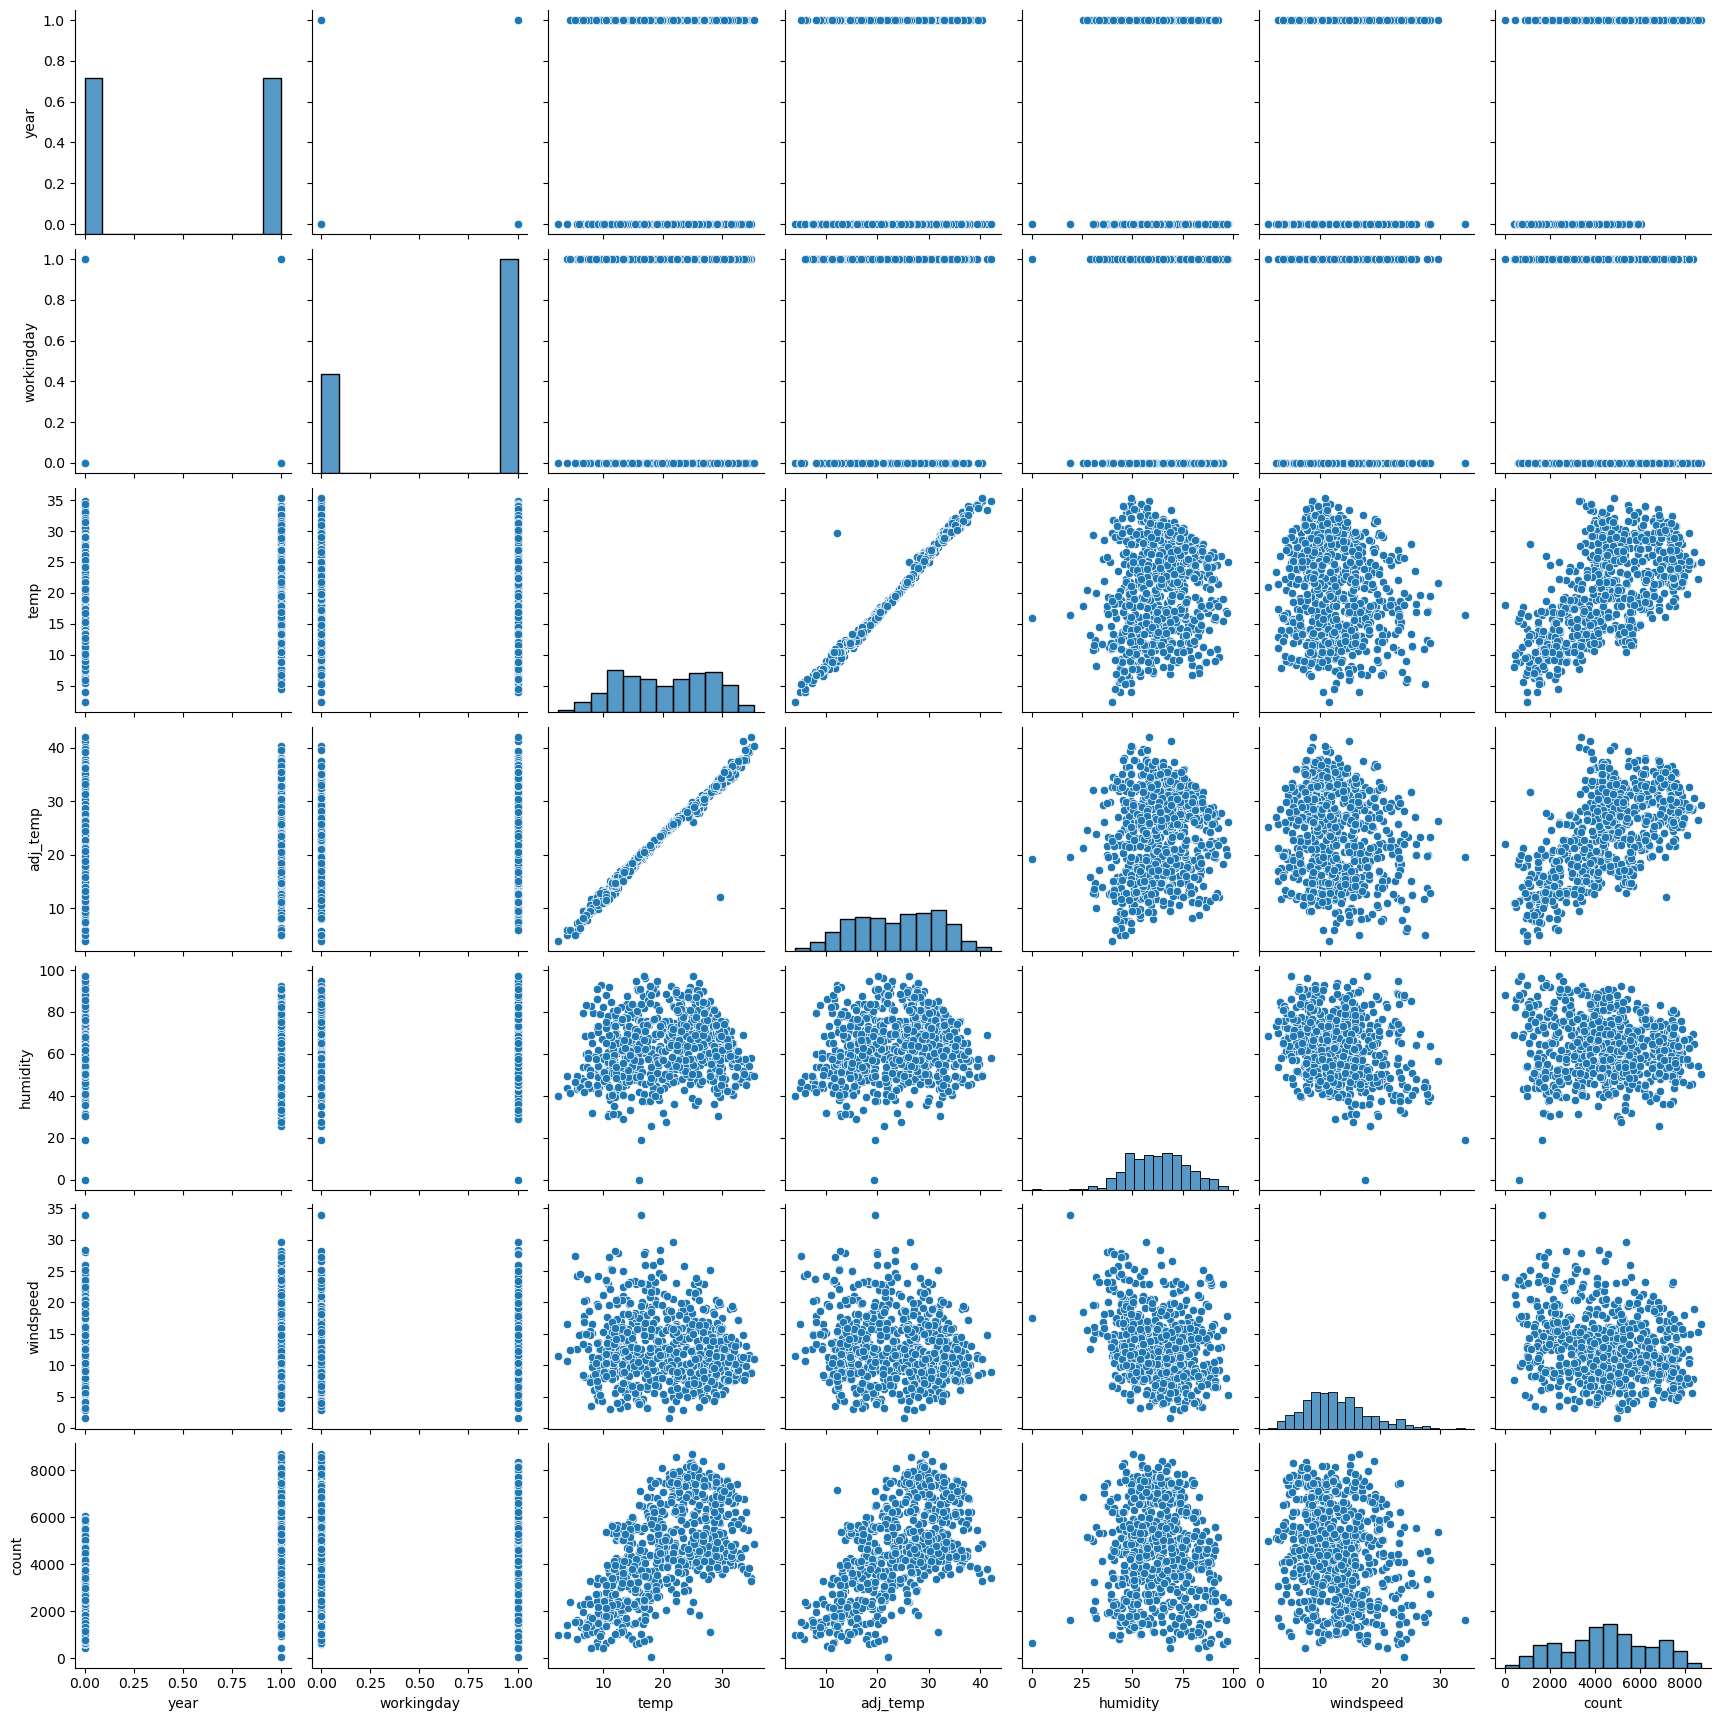

In [623]:
# visualize numerical variables
sns.pairplot(dm_days)

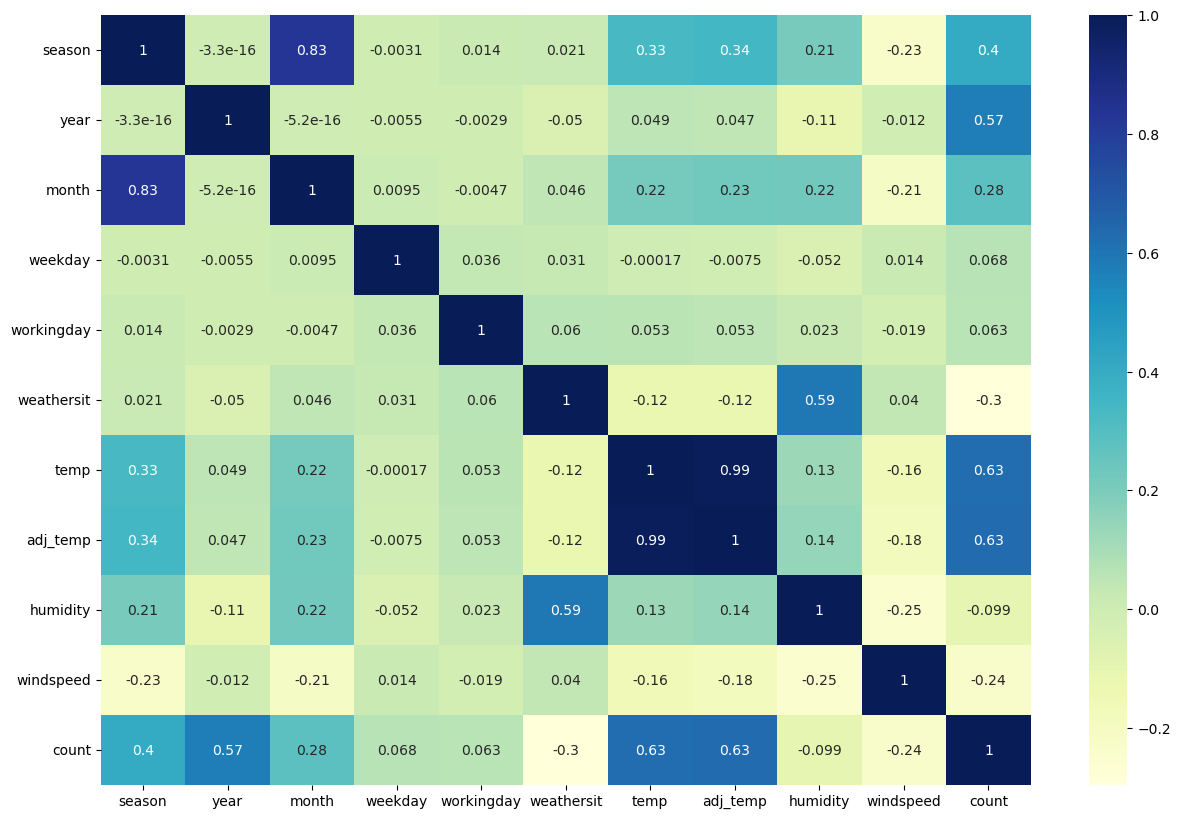

In [527]:
#Correraltion of numerical variables with Heat map
plt.figure(figsize=(15,10))
sns.heatmap(dm_days.corr(),cmap="YlGnBu",annot=True)
plt.show()

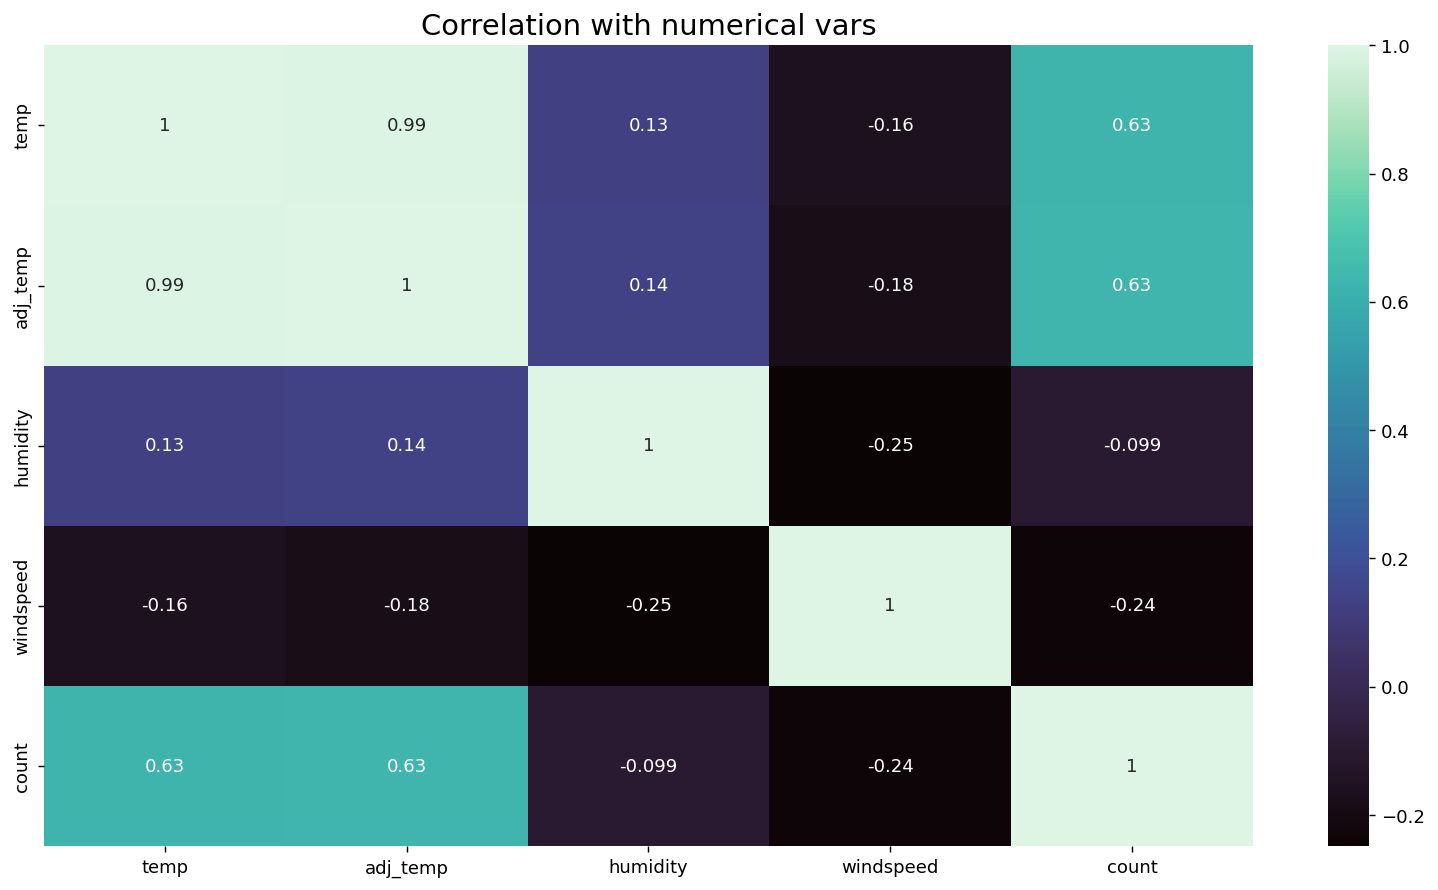

In [528]:
num_vars = ["temp","adj_temp","humidity","windspeed","count"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation with numerical vars",fontsize=16)
sns.heatmap(dm_days[num_vars].corr(),annot= True,cmap="mako")
plt.show()

In [529]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [530]:
# Change season,weathersit,month and weekday columns to categorical

# Encoding/mapping the season column

dm_days.season = dm_days.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Encoding/mapping the month column

dm_days.month = dm_days.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# Encoding/mapping the weekday column

dm_days.weekday = dm_days.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
# Encoding/mapping the weathersit column

dm_days.weathersit = dm_days.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [531]:
dm_days.head()

,season,year,month,weekday,workingday,weathersit,temp,adj_temp,humidity,windspeed,count
0,spring,0,jan,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


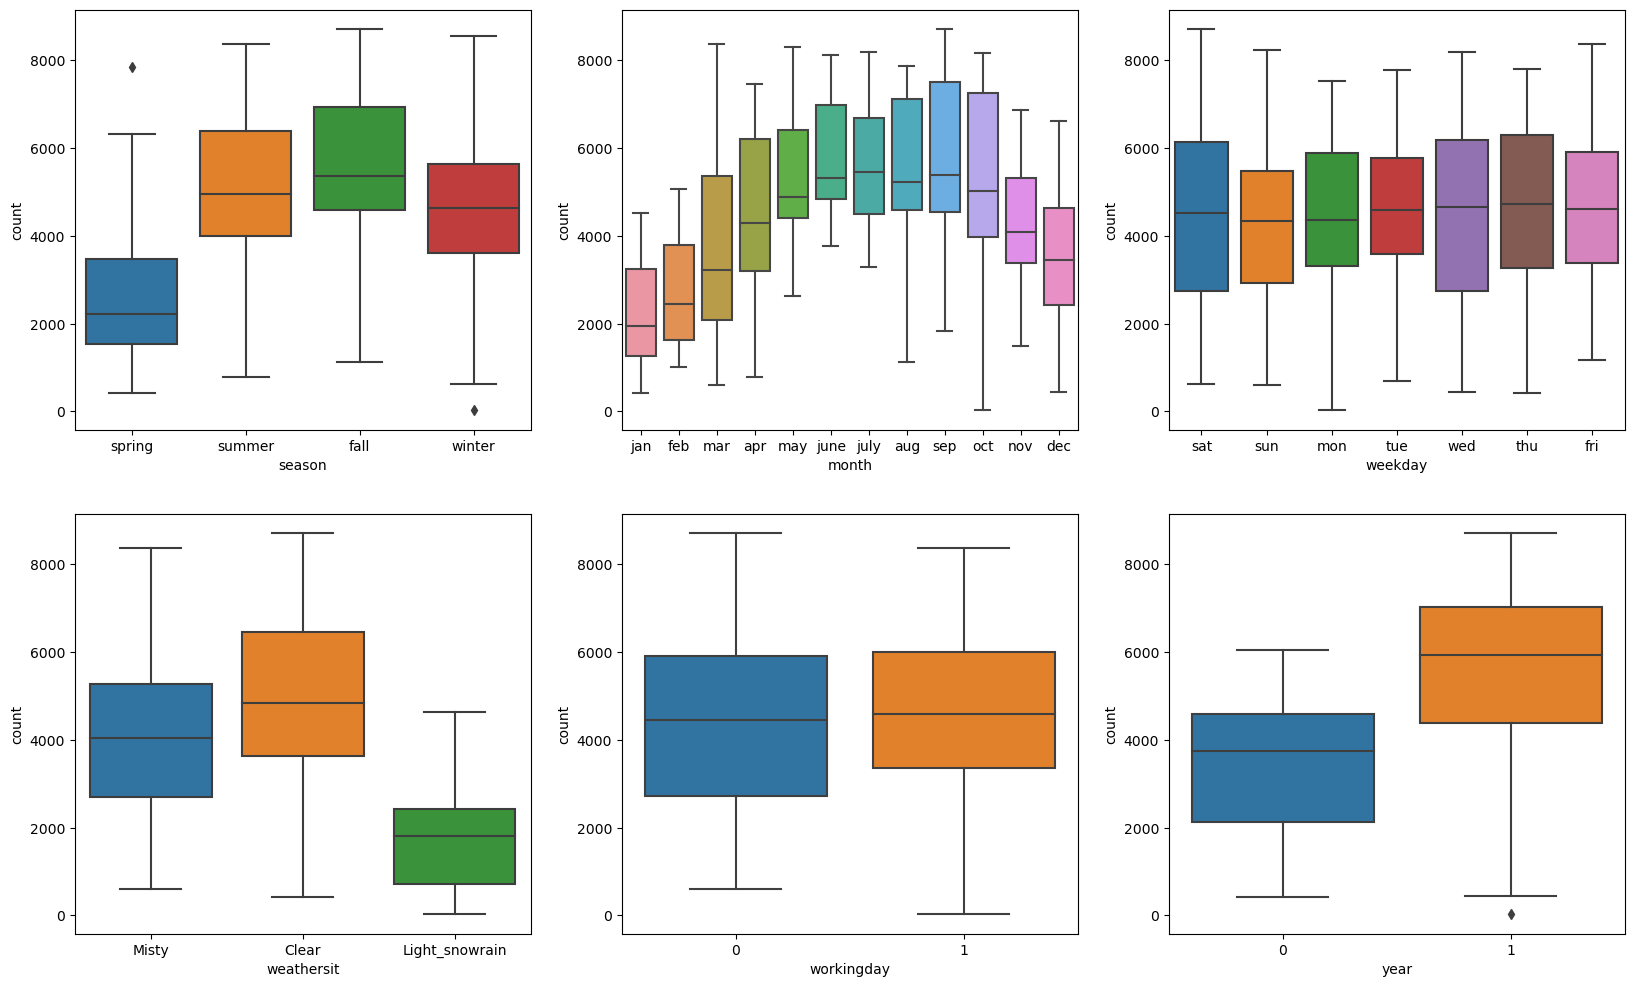

In [532]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = dm_days)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = dm_days)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'count', data = dm_days)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'count', data = dm_days)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'count', data = dm_days)
plt.subplot(2,3,6)
sns.boxplot(x = 'year', y = 'count', data = dm_days)
plt.show()

In [533]:
# function to create barplot related to categorical columns

def Cat_plot(col_name):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=col_name, y='count', data=dm_days)
    plt.subplot(1,2,2)
    sns.barplot(x=col_name, y='count', data=dm_days, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

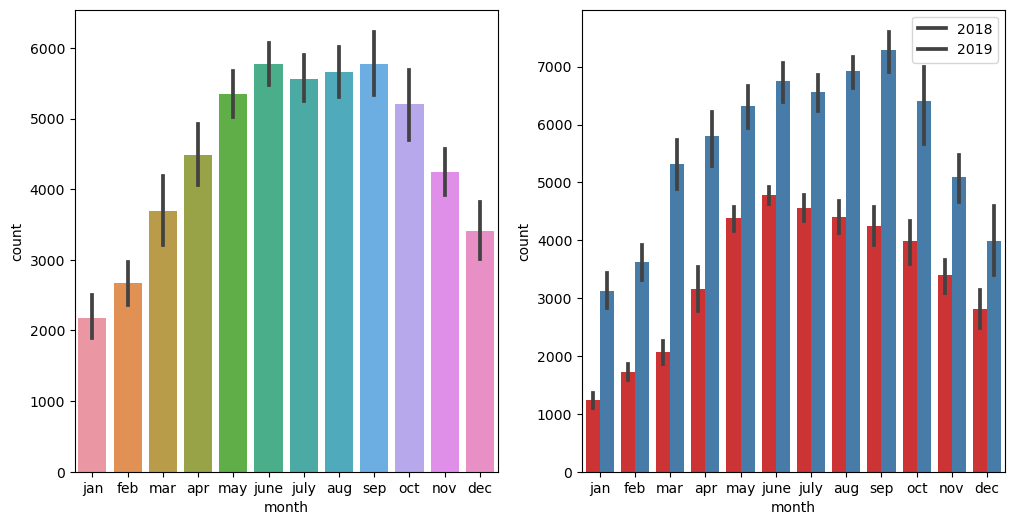

In [534]:
Cat_plot('month')

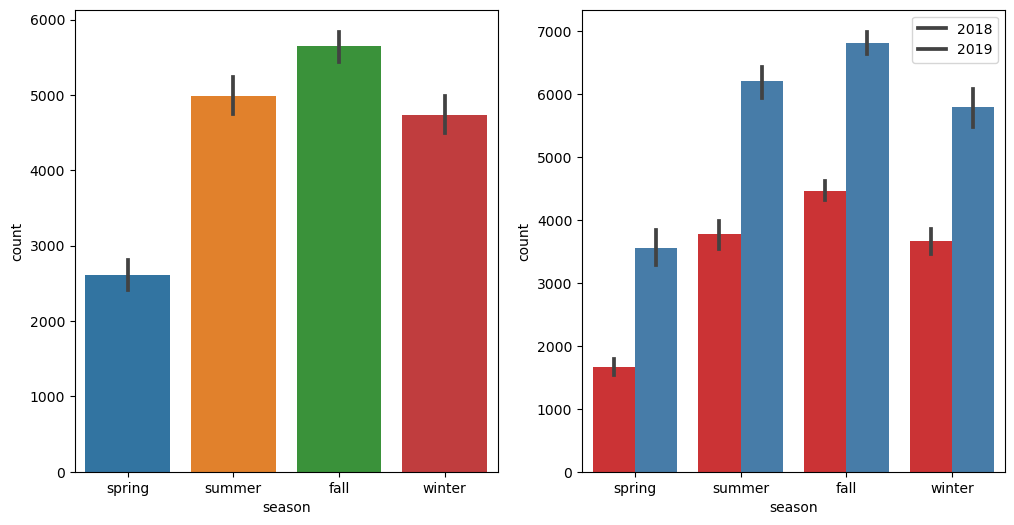

In [535]:
Cat_plot('season')

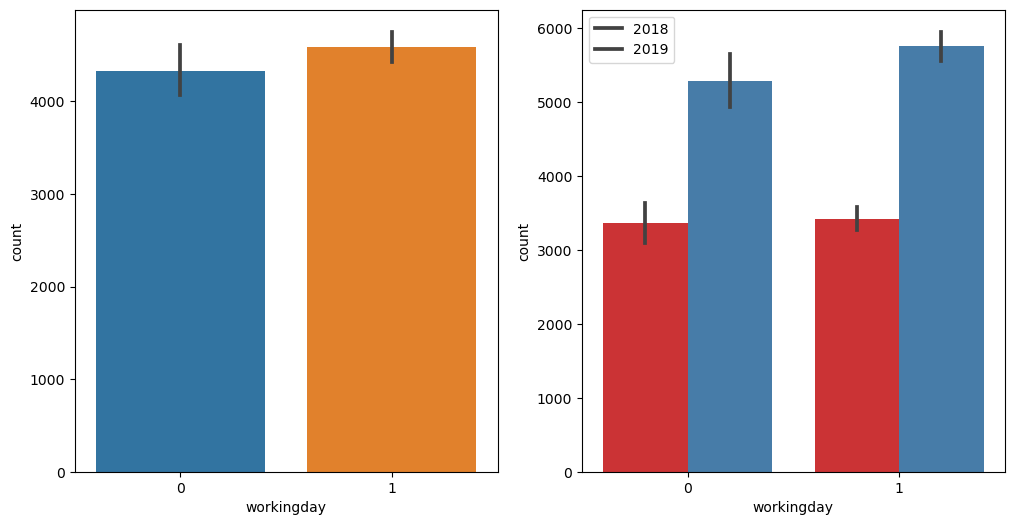

In [536]:
Cat_plot('workingday')

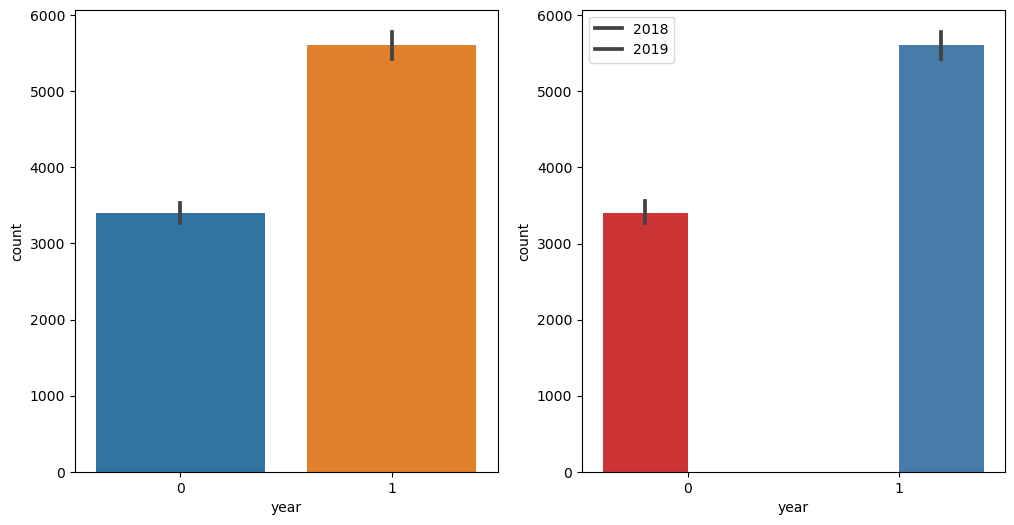

In [537]:
Cat_plot('year')

In [538]:
# Analysing/visualizing the numerical columns

#sns.pairplot(data=dm_days,vars=['temp','adj_temp','humidity','windspeed','count'])
#plt.show()

In [539]:
#create dummy columns for explaining 'month', 'season', 'weekday', 'weathersit' columns
dummy_cols = ['month', 'season', 'weekday', 'weathersit']
status_cols = pd.get_dummies(dm_days[dummy_cols], drop_first=True)

status_cols.head(10)

,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,...,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [540]:
# concatenate  dummies  to the  dataset
dm_days_dums = pd.concat([status_cols,dm_days],axis = 1)
dm_days_dums.head()

,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,...,year,month,weekday,workingday,weathersit,temp,adj_temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,jan,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,jan,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,jan,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,jan,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,jan,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [541]:
dm_days_pdums = dm_days_dums.drop(columns=dummy_cols)
dm_days_pdums.head()

,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,...,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,year,workingday,temp,adj_temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [542]:
#y -the target variable
Y=dm_days_pdums.pop('count')

#X is the independent variables (remaiining of Y)
X=dm_days_pdums

#splitting the data on 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 100)

In [543]:
# shapes of and sizes for actual,training data and test data
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(730, 28)
(510, 28)
(220, 28)


In [544]:
X.head()

,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,...,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,year,workingday,temp,adj_temp,humidity,windspeed
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,14.110847,18.18125,80.5833,10.749882
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,14.902598,17.68695,69.6087,16.652113
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,9.305237,11.46350,43.6957,12.522300


In [545]:
# Scale the independent variables which are not categorical
vars_set = ['temp','adj_temp','humidity','windspeed']

#Use MinMaxScaler
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[vars_set] = scaler.fit_transform(X_train[vars_set])

In [546]:
X_train.head()

,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,...,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,year,workingday,temp,adj_temp,humidity,windspeed
576,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0.815169,0.766351,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0.442393,0.438975,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.245101,0.200348,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0.395666,0.391735,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.345824,0.318819,0.751824,0.380981


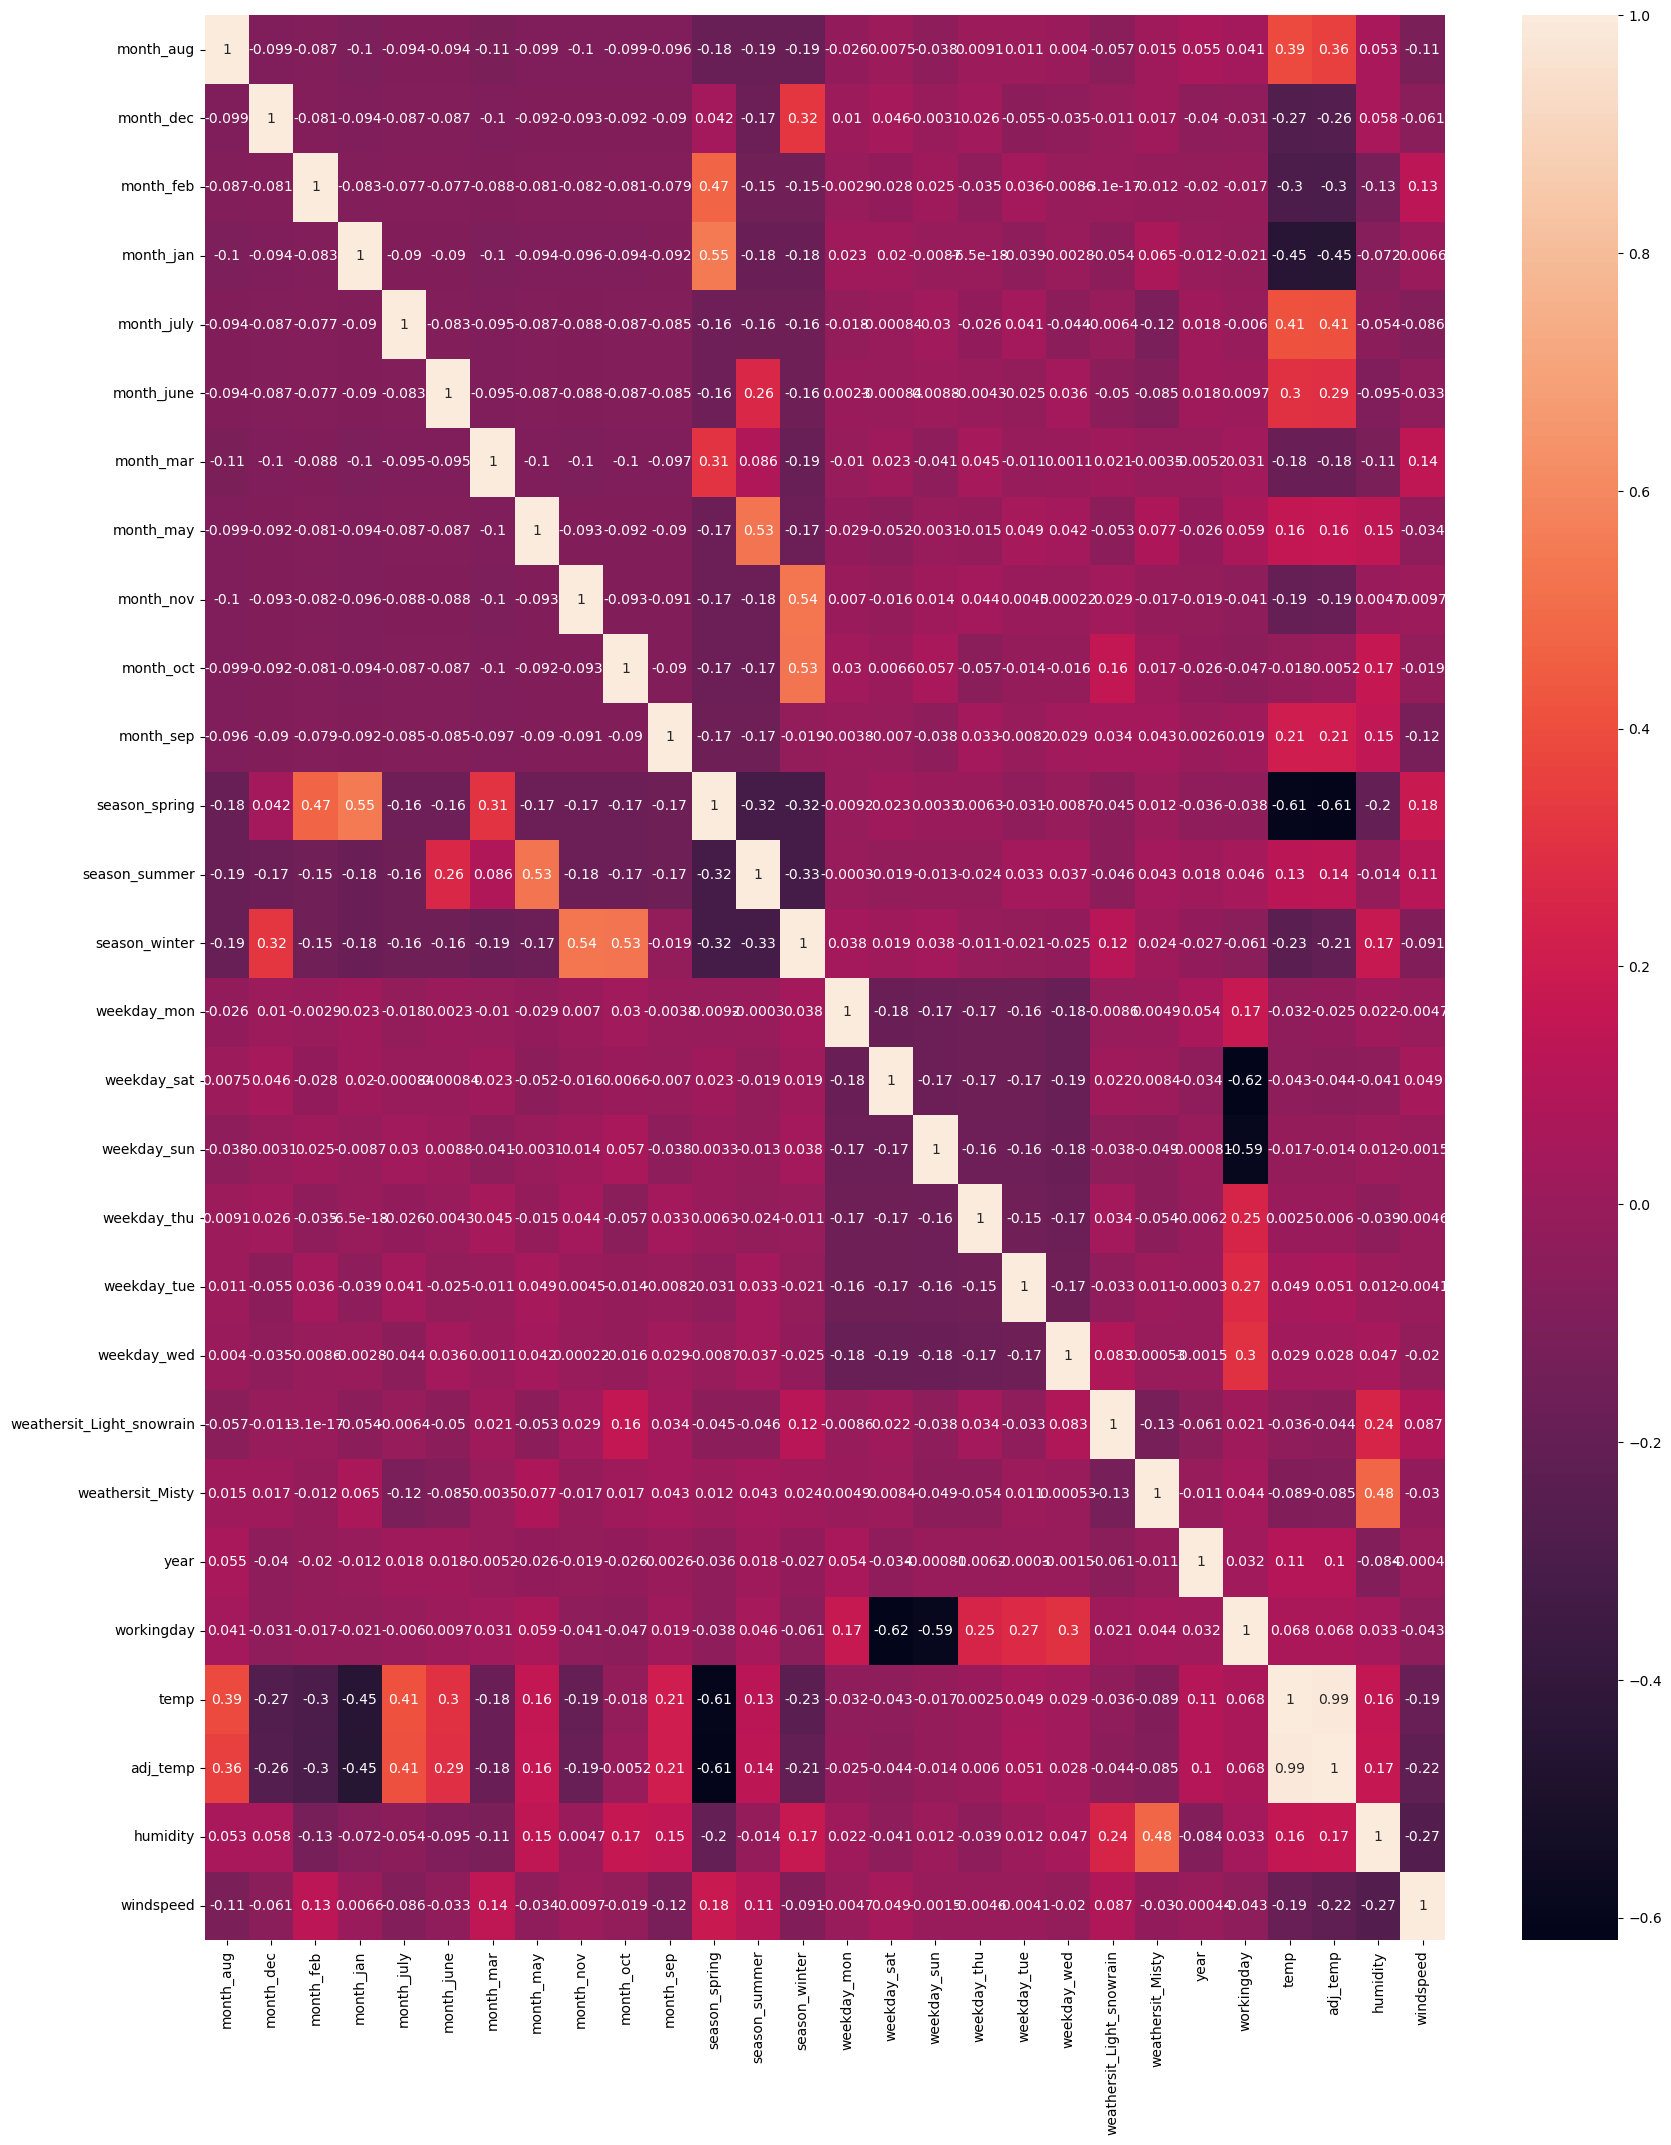

In [547]:
 #See the variables are highly correlated or not

plt.figure(figsize = (20, 25))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

## Train the model

In [548]:
#-statistical significance of the variable
#-VIF

#add a constant
X_train_sm=sm.add_constant(X_train['workingday'])

#create first model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params

const         4226.036364
workingday     383.314361
dtype: float64

In [549]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.338
Date:                Mon, 17 Jul 2023   Prob (F-statistic):             0.0378
Time:                        15:00:42   Log-Likelihood:                -4584.7
No. Observations:                 510   AIC:                             9173.
Df Residuals:                     508   BIC:                             9182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4226.0364    151.364     27.920      0.000    3928.661    4523.412
workingday   383.3144    184.034      2.083      0.038      21.754     744.875
==============================================================================
Omnibus:                       47.623   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.080
Skew:                          -0.038   Prob(JB):                     0.000531
Kurtosis:                       2.161   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [550]:
#add another variable

X_train_sm=X_train[['workingday','temp']]
X_train_sm=sm.add_constant(X_train_sm)


#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.4
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           2.15e-60
Time:                        15:00:42   Log-Likelihood:                -4448.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     507   BIC:                             8916.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1370.7510    190.472      7.197      0.000     996.539    1744.963
workingday   200.6601    141.417      1.419      0.157     -77.175     478.495
temp        5542.6619    293.206     18.904      0.000    4966.613    6118.711
==============================================================================
Omnibus:                        5.293   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.023
Skew:                           0.095   Prob(JB):                        0.134
Kurtosis:                       2.609   Cond. No.                         6.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [551]:
#add another variable

X_train_sm=X_train[['workingday','temp','windspeed']]
X_train_sm=sm.add_constant(X_train_sm)


#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.32e-62
Time:                        15:00:42   Log-Likelihood:                -4440.8
No. Observations:                 510   AIC:                             8890.
Df Residuals:                     506   BIC:                             8906.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1999.0075    245.009      8.159      0.000    1517.648    2480.367
workingday   183.6781    139.445      1.317      0.188     -90.285     457.641
temp        5325.6189    294.058     18.111      0.000    4747.895    5903.343
windspeed  -1558.5772    390.573     -3.990      0.000   -2325.921    -791.234
==============================================================================
Omnibus:                        8.982   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.533
Skew:                           0.158   Prob(JB):                       0.0381
Kurtosis:                       2.544   Cond. No.                         9.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [552]:
#add some more variable

X_train_sm=X_train[['temp','windspeed','humidity','year','workingday']]
X_train_sm=sm.add_constant(X_train_sm)


#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     280.3
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          5.39e-143
Time:                        15:00:44   Log-Likelihood:                -4247.7
No. Observations:                 510   AIC:                             8507.
Df Residuals:                     504   BIC:                             8533.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2730.0915    279.400      9.771      0.000    2181.160    3279.023
temp        4980.2502    204.486     24.355      0.000    4578.500    5382.000
windspeed  -2124.5016    276.445     -7.685      0.000   -2667.629   -1581.374
humidity   -2080.0613    321.620     -6.467      0.000   -2711.942   -1448.181
year        2007.1023     90.333     22.219      0.000    1829.626    2184.579
workingday   139.1412     95.740      1.453      0.147     -48.958     327.240
==============================================================================
Omnibus:                       15.777   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.646
Skew:                          -0.338   Prob(JB):                     8.94e-05
Kurtosis:                       3.648   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [553]:
X_train.head()

,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,...,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,year,workingday,temp,adj_temp,humidity,windspeed
576,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0.815169,0.766351,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0.442393,0.438975,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.245101,0.200348,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0.395666,0.391735,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.345824,0.318819,0.751824,0.380981


In [554]:

#build model with all variable
X_train_sm=sm.add_constant(X_train)

#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          2.81e-180
Time:                        15:00:46   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2231.4178    453.736      4.918      0.000    1339.868    3122.968
month_aug                   193.5713    294.433      0.657      0.511    -384.962     772.104
month_dec                  -384.8315    292.519     -1.316      0.189    -959.605     189.942
month_feb                  -280.8921    286.571     -0.980      0.327    -843.977     282.193
month_jan                  -548.1528    292.204     -1.876      0.061   -1122.307      26.002
month_july                 -283.8506    304.748     -0.931      0.352    -882.652     314.951
month_june                   52.2549    217.168      0.241      0.810    -374.460     478.970
month_mar                    13.5128    213.815      0.063      0.950    -406.614     433.639
month_may                   222.0003    183.818      1.208      0.228    -139.185     583.185
month_nov                  -346.1020    316.564     -1.093      0.275    -968.121     275.918
month_oct                    67.0449    312.229      0.215      0.830    -546.456     680.546
month_sep                   754.1233    278.215      2.711      0.007     207.456    1300.790
season_spring              -394.2228    260.924     -1.511      0.131    -906.915     118.469
season_summer               368.2736    227.759      1.617      0.107     -79.252     815.799
season_winter               930.7444    243.295      3.826      0.000     452.692    1408.796
weekday_mon                -187.9576    134.168     -1.401      0.162    -451.584      75.669
weekday_sat                 732.5998    263.585      2.779      0.006     214.680    1250.520
weekday_sun                 261.3296    264.285      0.989      0.323    -257.967     780.626
weekday_thu                 -84.5755    135.742     -0.623      0.534    -351.295     182.144
weekday_tue                -160.2692    135.333     -1.184      0.237    -426.187     105.649
weekday_wed                 -51.2569    130.031     -0.394      0.694    -306.756     204.243
weathersit_Light_snowrain -2216.2460    230.125     -9.631      0.000   -2668.421   -1764.071
weathersit_Misty           -517.3529     90.743     -5.701      0.000    -695.654    -339.052
year                       2021.2265     70.196     28.794      0.000    1883.299    2159.155
workingday                  742.1292    232.227      3.196      0.001     285.825    1198.433
temp                       3372.3586   1236.595      2.727      0.007     942.564    5802.153
adj_temp                    513.2207   1203.335      0.426      0.670   -1851.222    2877.663
humidity                  -1321.3195    335.550     -3.938      0.000   -1980.645    -661.994
windspeed                 -1595.8864    229.236     -6.962      0.000   -2046.314   -1145.458
===========================================================================

In [555]:
#significance (p-values)
#VIF

#VIF=1-1/R.sq

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending = False)
vif

,Features,VIF
24,temp,431.13
25,adj_temp,382.84
26,humidity,39.74
23,workingday,22.40
11,season_spring,12.34
13,season_winter,12.07
12,season_summer,7.93
15,weekday_sat,6.63
0,month_aug,6.38
9,month_oct,6.38


In [556]:
## Drop columns based on the below logic 

#-We could have high p- value high vif

#-high-low

#high p value,low vif   - remove these first

#high vif,low pvalue    - remove these next
#-low p,low vif

In [557]:
#The number of independent variable have become too many , 
#let us use RFE automation for dropping them one by one based one p-value and VIF


# Building the Linear Model

# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

#minimise features to 15 using automation approach
rfe = RFE(estimator=lm,n_features_to_select=15)
rfe.fit(X_train,y_train)

#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('month_aug', False, 7),
 ('month_dec', False, 3),
 ('month_feb', False, 4),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 13),
 ('month_mar', False, 14),
 ('month_may', False, 6),
 ('month_nov', False, 2),
 ('month_oct', False, 12),
 ('month_sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1),
 ('year', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('adj_temp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [558]:
# setting up method for resusing it for every time calculating VIF
def VIFGet(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [559]:
#Selected columns for by RFE
col = X_train.columns[rfe.support_]
print(col)


Index(['month_jan', 'month_july', 'month_sep', 'season_spring',
       'season_summer', 'season_winter', 'weekday_sat', 'weekday_sun',
       'weathersit_Light_snowrain', 'weathersit_Misty', 'year', 'workingday',
       'temp', 'humidity', 'windspeed'],
      dtype='object')


In [560]:

#Rejected columns for by RFE

X_train.columns[~rfe.support_]

Index(['month_aug', 'month_dec', 'month_feb', 'month_june', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'weekday_mon', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'adj_temp'],
      dtype='object')

In [562]:


lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [612]:
rfedataset = pd.DataFrame({'Preds': X_train.columns, 'Select': rfe.support_, 'Ranks': rfe.ranking_})
rfedataset.sort_values(by='Ranks')



##RFE method has successfully evaluated top 15 predictors which will impact our outcome.

    ### Selected 15 predictors that will affect the outcomes, this is done by RFE method

,Preds,Select,Ranks
13,season_winter,True,1
24,temp,True,1
23,workingday,True,1
22,year,True,1
21,weathersit_Misty,True,1
20,weathersit_Light_snowrain,True,1
16,weekday_sun,True,1
15,weekday_sat,True,1
26,humidity,True,1
12,season_summer,True,1


In [613]:
#model builld- by add all selected coulmns of RFE 
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          4.22e-191
Time:                        16:36:46   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1705.8147    369.007      4.623      0.000     980.798    2430.831
month_jan                  -299.9787    150.791     -1.989      0.047    -596.250      -3.707
month_july                 -459.9603    156.948     -2.931      0.004    -768.328    -151.592
month_sep                   707.4835    143.080      4.945      0.000     426.364     988.603
season_spring              -442.3970    179.551     -2.464      0.014    -795.176     -89.618
season_summer               441.2212    128.897      3.423      0.001     187.966     694.476
season_winter               810.9723    150.105      5.403      0.000     516.049    1105.895
weekday_sat                 971.1089    232.398      4.179      0.000     514.498    1427.720
weekday_sun                 505.6380    233.674      2.164      0.031      46.521     964.755
weathersit_Light_snowrain -2150.9597    226.245     -9.507      0.000   -2595.482   -1706.438
weathersit_Misty           -489.5196     90.004     -5.439      0.000    -666.357    -312.682
year                       2003.7410     69.586     28.795      0.000    1867.019    2140.463
workingday                  882.3056    219.959      4.011      0.000     450.135    1314.476
temp                       4429.6085    298.555     14.837      0.000    3843.015    5016.202
humidity                  -1358.5494    324.373     -4.188      0.000   -1995.871    -721.228
windspeed                 -1618.9605    221.474     -7.310      0.000   -2054.108   -1183.813
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [614]:
VIFGet(X_train_rfe)

,Features,VIF
0,humidity,32.78
1,temp,19.98
2,workingday,18.57
3,season_spring,5.04
4,weekday_sat,4.95
5,windspeed,4.92
6,weekday_sun,4.79
7,season_winter,3.74
8,season_summer,3.05
9,weathersit_Misty,2.31


In [615]:
# month_jan has high PValue , so dropping it
col = col.drop(['month_jan'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          2.11e-191
Time:                        16:36:47   Log-Likelihood:                -4108.2
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8310.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1595.9416    365.939      4.361      0.000     876.957    2314.926
month_july                 -474.7266    157.240     -3.019      0.003    -783.667    -165.786
month_sep                   712.5975    143.483      4.966      0.000     430.686     994.509
season_spring              -482.8100    178.931     -2.698      0.007    -834.367    -131.253
season_summer               467.0445    128.625      3.631      0.000     214.327     719.762
season_winter               862.3686    148.306      5.815      0.000     570.982    1153.755
weekday_sat                 974.4996    233.085      4.181      0.000     516.541    1432.458
weekday_sun                 513.5522    234.337      2.192      0.029      53.135     973.969
weathersit_Light_snowrain -2129.6199    226.665     -9.395      0.000   -2574.964   -1684.276
weathersit_Misty           -489.7414     90.272     -5.425      0.000    -667.106    -312.377
year                       1997.1030     69.714     28.647      0.000    1860.132    2134.074
workingday                  887.5954    220.599      4.024      0.000     454.169    1321.021
temp                       4586.8396    288.762     15.884      0.000    4019.489    5154.190
humidity                  -1400.1560    324.664     -4.313      0.000   -2038.045    -762.267
windspeed                 -1572.1644    220.878     -7.118      0.000   -2006.139   -1138.190
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [616]:
VIFGet(X_train_rfe)


,Features,VIF
0,humidity,32.10
1,temp,18.99
2,workingday,18.41
3,weekday_sat,4.91
4,windspeed,4.91
5,season_spring,4.80
6,weekday_sun,4.76
7,season_winter,3.69
8,season_summer,3.04
9,weathersit_Misty,2.31


In [617]:


# humidity has high VIF , so dropping it
col = col.drop(['humidity'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          1.28e-188
Time:                        16:36:48   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       898.3287    334.017      2.689      0.007     242.065    1554.592
month_july                 -431.4061    159.678     -2.702      0.007    -745.136    -117.677
month_sep                   660.0216    145.479      4.537      0.000     374.191     945.852
season_spring              -569.3704    180.928     -3.147      0.002    -924.851    -213.890
season_summer               414.4050    130.296      3.180      0.002     158.405     670.405
season_winter               735.2355    147.903      4.971      0.000     444.642    1025.828
weekday_sat                 996.2442    237.129      4.201      0.000     530.343    1462.145
weekday_sun                 493.1758    238.409      2.069      0.039      24.759     961.592
weathersit_Light_snowrain -2516.4500    211.823    -11.880      0.000   -2932.631   -2100.269
weathersit_Misty           -714.1477     75.064     -9.514      0.000    -861.630    -566.666
year                       2031.5571     70.472     28.828      0.000    1893.096    2170.018
workingday                  894.0494    224.473      3.983      0.000     453.014    1335.085
temp                       4272.3837    284.318     15.027      0.000    3713.767    4831.000
windspeed                 -1295.6800    215.087     -6.024      0.000   -1718.273    -873.086
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [618]:
VIFGet(X_train_rfe)


,Features,VIF
0,workingday,16.19
1,temp,12.74
2,windspeed,4.76
3,weekday_sat,4.45
4,weekday_sun,4.21
5,season_spring,3.82
6,season_winter,2.78
7,season_summer,2.76
8,year,2.07
9,month_july,1.60


In [619]:
# workingday has high PValue , so dropping it

col = col.drop(['workingday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          2.06e-186
Time:                        16:36:48   Log-Likelihood:                -4125.6
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     497   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1763.1745    257.573      6.845      0.000    1257.108    2269.241
month_july                 -424.2830    162.038     -2.618      0.009    -742.648    -105.918
month_sep                   628.6605    147.422      4.264      0.000     339.014     918.307
season_spring              -591.8912    183.524     -3.225      0.001    -952.470    -231.313
season_summer               417.7641    132.227      3.159      0.002     157.971     677.557
season_winter               709.4915    149.955      4.731      0.000     414.868    1004.115
weekday_sat                 136.5290     99.628      1.370      0.171     -59.216     332.274
weekday_sun                -365.8212    103.117     -3.548      0.000    -568.420    -163.222
weathersit_Light_snowrain -2475.7040    214.716    -11.530      0.000   -2897.567   -2053.841
weathersit_Misty           -697.5007     76.060     -9.170      0.000    -846.939    -548.063
year                       2035.7171     71.510     28.467      0.000    1895.217    2176.217
temp                       4283.7704    288.524     14.847      0.000    3716.894    4850.647
windspeed                 -1314.7357    218.225     -6.025      0.000   -1743.493    -885.978
==============================================================================
Omnibus:                       80.355   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.836
Skew:                          -0.790   Prob(JB):                     7.39e-46
Kurtosis:                       5.699   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [620]:
VIFGet(X_train_rfe)


,Features,VIF
0,temp,5.18
1,windspeed,4.62
2,season_summer,2.24
3,season_spring,2.11
4,year,2.07
5,season_winter,1.82
6,month_july,1.59
7,weathersit_Misty,1.55
8,month_sep,1.33
9,weekday_sat,1.22


In [621]:
# weekday_sat has high PValue , so dropping it

col = col.drop(['weekday_sat'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          3.37e-187
Time:                        16:36:48   Log-Likelihood:                -4126.6
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     498   BIC:                             8328.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1789.8389    257.063      6.963      0.000    1284.777    2294.901
month_july                 -419.4141    162.142     -2.587      0.010    -737.981    -100.847
month_sep                   628.6150    147.551      4.260      0.000     338.715     918.515
season_spring              -592.7688    183.685     -3.227      0.001    -953.661    -231.876
season_summer               416.2182    132.339      3.145      0.002     156.207     676.230
season_winter               711.2629    150.081      4.739      0.000     416.393    1006.133
weekday_sun                -390.7877    101.584     -3.847      0.000    -590.374    -191.201
weathersit_Light_snowrain -2474.2095    214.903    -11.513      0.000   -2896.437   -2051.982
weathersit_Misty           -697.4159     76.127     -9.161      0.000    -846.985    -547.847
year                       2032.8540     71.543     28.414      0.000    1892.291    2173.417
temp                       4274.2180    288.694     14.805      0.000    3707.010    4841.426
windspeed                 -1301.1437    218.192     -5.963      0.000   -1729.834    -872.454
==============================================================================
Omnibus:                       75.768   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.623
Skew:                          -0.732   Prob(JB):                     3.69e-45
Kurtosis:                       5.736   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [622]:
VIFGet(X_train_rfe)

,Features,VIF
0,temp,5.14
1,windspeed,4.60
2,season_summer,2.23
3,season_spring,2.09
4,year,2.07
5,season_winter,1.80
6,month_july,1.59
7,weathersit_Misty,1.55
8,month_sep,1.33
9,weekday_sun,1.17


### We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
### F-Statistics value of 213.0 (which is greater than 1) and the R-squared:	0.836  states that the overall model is significant

## Residual Analysis


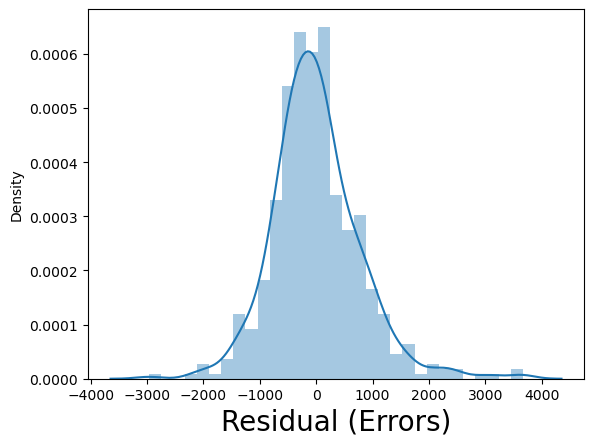

In [600]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Errors)', fontdict={'fontsize': 20})
plt.title('', fontdict={'fontsize': 25})
plt.show()

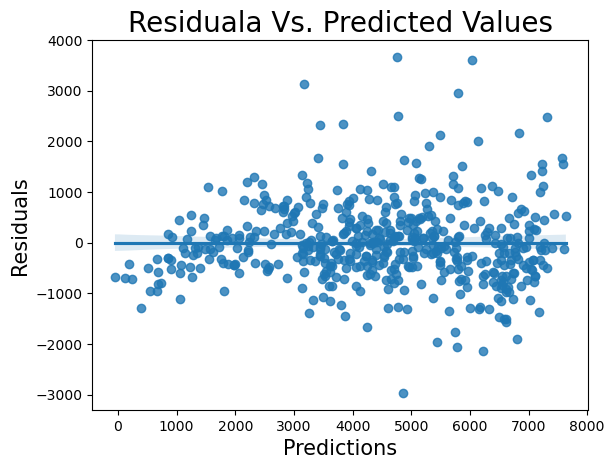

In [601]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residuala Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predictions', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

## 5. Prediction and evaluation

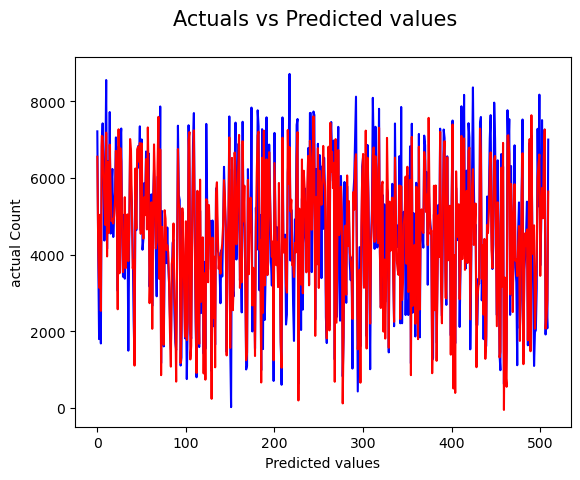

In [603]:
# Actuals vs Predicted values
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actuals vs Predicted values', fontsize = 15)
plt.xlabel('Predicted values')
plt.ylabel('actual Count')
plt.show()

In [579]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8371846277572346

### Prediction of  test data

In [604]:
# independent variables which are not categorical
vars_set = ['temp','adj_temp','humidity','windspeed']
scaler = MinMaxScaler()

X_test[vars_set] = scaler.fit_transform(X_test[vars_set])
X_test.head(10)

,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,...,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,year,workingday,temp,adj_temp,humidity,windspeed
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.837241,0.778767,0.534223,0.149393
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0.911423,0.855132,0.470417,0.231142
299,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0.496221,0.492359,0.777843,0.443398
221,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.890387,0.805661,0.236659,0.449707
152,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0.821739,0.749249,0.070765,0.682387
404,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0.223848,0.224250,0.428654,0.433978
198,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0.863814,0.831697,0.552784,0.489012
171,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0.776344,0.740596,0.718678,0.375796
512,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0.818418,0.797849,0.587587,0.440258
200,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0.892600,0.890698,0.630510,0.231154


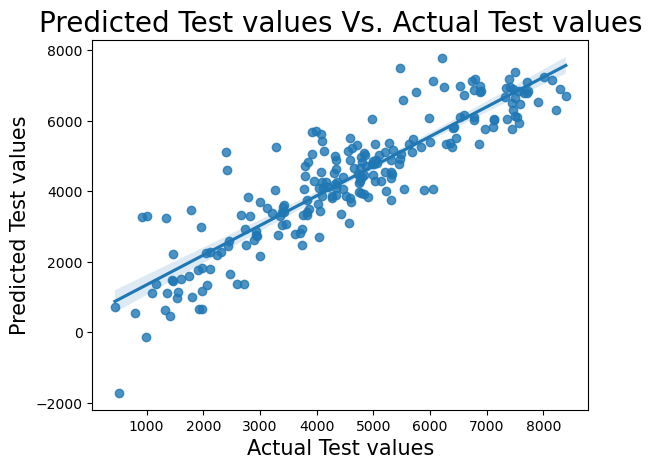

In [605]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lr_model.predict(X_test_new)
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test values Vs. Actual Test values', fontdict={'fontsize': 20})
plt.xlabel('Actual Test values', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test values', fontdict={'fontsize': 15})
plt.show()

In [596]:
r2_score(y_test, y_test_pred)


0.7852804328467271

In [609]:
#R-squared Value of Train data set : 0.8371846277572346
#R-squared Value of Test data set :0.7852804328467271


# Conclusion 

Bike Demands for BoomBikes are based on the feature below

0   temp	 

1	windspeed	

2	season_summer	

3	season_spring	

4	year	

5	season_winte

6	month_july	

7	weathersit_Misty	

8	month_sep	

9	weekday_sun	

10	weathersit_Light_snowrain	
